# 로지스틱 회귀분석

In [2]:
pip install mord

In [3]:
from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from mord import LogisticIT
import matplotlib.pylab as plt
import seaborn as sns
import dmba
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score


%matplotlib inline

## Intro
### 로지스틱 회귀분석의 간단한 설명
* 선형 회귀분석
    * 선형 회귀분석은 예측을 위한 모델로 사용할 함수를 발견하는 과정
    * 이 함수는 X값에 대하여 선형으로 변하는 y값들을 적합
    * 여기서 중요한 가정은 예측변수와 타겟변수 둘 다 연속형
    * X값이 증가하면 y값은 직선의 기울기를 따라 증가
* 만약 타겟변수가 연속형이 아니라면
    * 예: 타겟변수가 광고 켐페인에 대한 반응일 때
    * 일정한 수 이상의 고객이 구매를 하면 반응값 1, 그렇지 않으면 반응값 0
    * 이 경우 타겟변수 y는 이산형

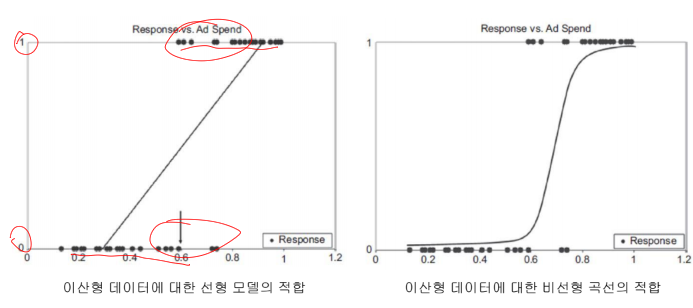

* 이 경우 직선은 부적절
    * X(광고비)가 증가할 때 y(우편 광고에 대한 반응 여부)는 0이나 1에서 다른 값으로 갑자기 변화
* S모양 곡선: 시그모이드 곡선
    * 주어진 자료에 대해서 이것이 더 적합
    * 이 곡선의 수학식을 알 수 있다면 효과적으로 이 수학식 사용 가능
* 로지스틱 회귀분석
    * 타겟변수가 이산형일 때 데이터를 적합시키는 데 적당한 비선형 곡선을 구하는 과정

## 로지스틱 회귀모델
### 로지스틱 회귀모델이란?
* 입력 변수와 출력 변수 사이의 관계를 모델링하는 데 사용되는 통계학적 분류 모델
* 범주형 응답에 사용된다는 점을 제외하면 선형 회귀와 유사
* 프로파일링(설명 작업) 또는 예측 작업(=분류)에 사용할 수 있음
* 로짓(logit)이라는 비선형 함수를 통해 결과변수 Y와 관련됨
* 선형회귀에서와 마찬가지로 변수 선택을 통해 예측 변수를 줄일 수 있음
* 로지스틱 회귀는 두 개 이상의 클래스로 일반화할 수 있음

### 로지스틱 회귀 모델 응용 분석 분야
* 고객을 재구매 고객과 처음 구매한 고객으로 분류하기(분류)
* 남자 최고 경영진과 여자 최고 경영진을 구별하는 요인 찾기(프로파일링)
* 신용 점수와 같은 정보로부터 대출의 승인 또는 비승인 예측하기(분류)

### 기법 원리
* 종속 변수 y:
    * 이항(binomial)이라면 (예/아니오, 합격/불합격, 반응/무반응)
    * y를 0 또는 1의 값으로 코드화
* 어려운 점
    * 예측변수 X를 결과변수 y에 함수로 연결시키는 수학식을 발견하는 것
* 로지스틱 회귀분석에서 시그모이드 곡선을 어떻게 구하는가?
    * 단순한 회귀분석의 경우
        $$y=b_0+b_1x$$
        * 직선은 2개의 파라미터(기울기 b1과 y절편 b0)로 표현
        * x변수들과 y변수가 서로 연관되는 방식은 (b1, b0)로 쉽게 명시
    * S모양 곡선은 훨씬 복잡
        * 파라미터로 나타내는 것은 간단하지 않다
        * x변수들과 y변수를 연관시키는 수리적인 파라미터들을 어떻게 구할 것인가?
    * 시그모이드 함수
        * 로지스틱 회귀에서 사용하는 S자 함수
        * x값이 커지면 y값은 1에 근사하게 되고, x값이 작아지면 y의 값은 0에 근사하게 되어 S자 형태의 그래프가 됨
        * 두 개의 값을 분류하는 이진 분류에 많이 사용

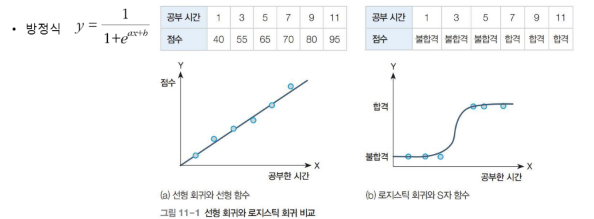

* 로지스틱 회귀분석에서 시그모이드 곡선을 어떻게 구하는가?
    * 타겟변수 y를 오즈(odds)의 로그함수로 변환
        * 변환된 y는 예측변수 x와 선형으로 연관된다는 것이 입증
    * 승산(odds)의 개념
        * y가 어떤 사건이고(반응, 합격/불합격 등)
        * p가 그 사건이 일어날(y=1) 확률이면
        * (1-p)는 그 사건이 일어나지 않을(y=0) 확률이고
        * p(1-p)는 그 사건이 일어날 승산(odds)
    * 오즈(odds, 승산)의 로그 log(p/(1-p))는 예측변수 x와 선형 관계
        * 로짓 함수
    * 로짓은 예측변수 x의 선혀함수로 표현 가능
        $$logit=log(\frac{p}{1-p})=b_0+b_1x$$
* 로지스틱 회귀분석에서 시그모이드 곡선을 어떻게 구하는가?
    * 독립변수가 여러 개인 일반적인 경우
        $$logit=log(\frac{p}{1-p})=b_0+b_1x_1+b_2x_2+...+b_nx_n$$
    * 로짓은 $-\infty$에서 $+\infty$까지의 어떤 값도 취할 수 있다.
        * 이제 데이터셋의 예측변수의 각 행에 대해 로짓 값 계산 가능
        * 이 로짓 값으로 다음의 식을 이용, 반응변수 y의 확률 p 계산
        $$p=\frac{e^{logit}}{1+e^{logit}} \leftarrow logit=log(\frac{p}{1-p})$$
    * 로지스틱 회귀분석은 다음과 같이 정의된다.
        * 다수의 독립적인 설명변수들과 하나의 이진형 종속변수 간의 관계를 설명하기 위해 가장 잘 적합하면서도 가장 비제한적인 모델을 선택하는 수학적 모델화 방법
            * 가장 비제한적: 로짓의 우변이 $-\infty$에서 $+\infty$까지의 어떤 값도 가능
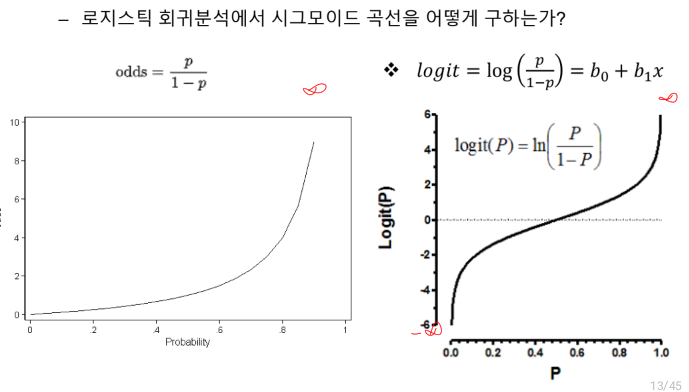   

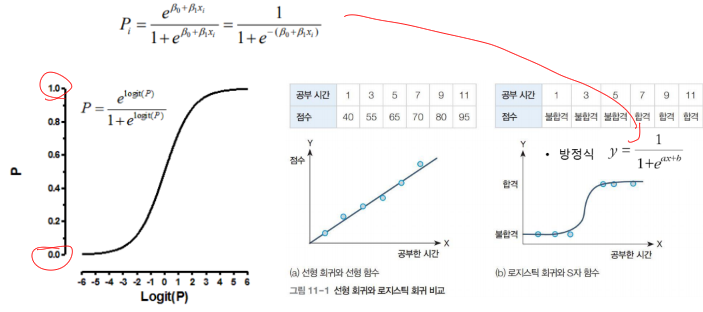

* 로짓 변환
    * P를 추정하기 위한 함수를 Logistic함수로 정의하고, 이를 로짓 변환하면 선형회귀모형 형태의 방정식이 됨
    * 회귀계수 $\beta_i$는 X가 한 단위 증가할 때, log odds ratio의 장가분을 말하므로 odds ratio가 exp($\beta_i$)배 증가함을 의미

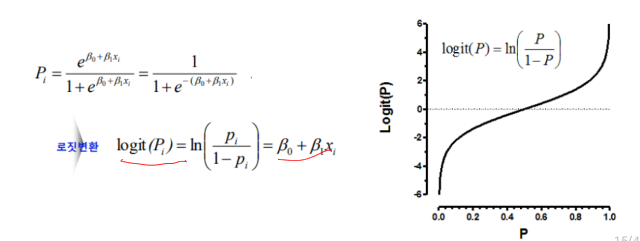

## 로짓
### 1단계: 로지스틱 반응 함수
* p=클래스 1에 속할 확률
* 확률 p를 q개의 예측변수들에 대한 선형함수로 (10.1)과 같이 나타낸다면 우변항이 구간[0, 1]에 들어간다는 것을 보장할 수 없음
* 문제를 해결하기 위해 (10.2)와 같이 예측변수들에 대한 비선형 함수를 사용
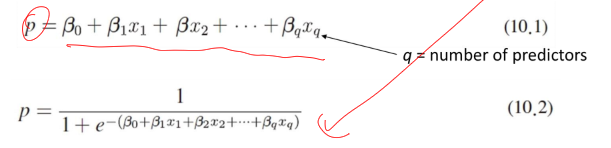

### 2단계: 오즈(odd)
* 오즈
$$odds(Y=1)=\frac{p}{1-p}$$
* 이벤트의 확률이 주어지면 다음과 같이 이벤트의 오즈 계산
$$P=\frac{odds}{1+odds}$$
* 오즈를 예측자와 연관
$$odds(Y=1)=e^{\beta_0+\beta_1x_1+\beta_2x_2+...+\beta_qx_q}$$
* 예측변수와 오즈 사이의 비례 관계를 설명
* 예측변수 X_j가 한 단위 증가하면 다른 예측변수들이 모두 일정하다고 가정할 때 오즈는 $e^{\beta_j}$만큼 증가함

### 3단계: 양쪽에서 로그를 가져옴
$$log(odds)=\beta_0+\beta_1x_1+...+\beta_qx_q$$
* 이 때의 log(odds)를 로짓(logit)이라고 부르며 $-\infty$(매우 낮은 오즈)부터 $\infty$(매우 높은 오즈) 사이의 값을 가질 수 있음
* 로짓=0이면 오즈=1(확률=0.5)
* 반응 변수와 예측 변수의 관계를 나타내는 최종 형태는 로짓을 반응변수로 하여 q개의 예측 변수에 대한 선형 함수로 모델링하는 것

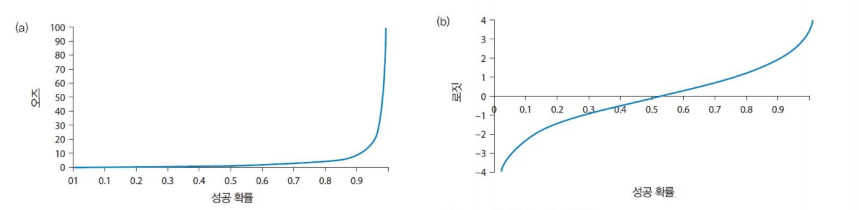

## 예제: 개인 대출 신청 수락
* 결과 변수: 은행 대출 수락(0, 1)
* 예측 변수: 인구통계학적 정보 및 은행 관계에 대한 정보

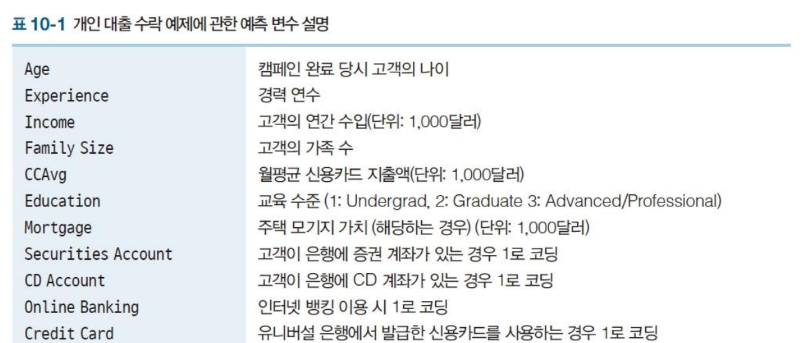

### 데이터로부터 로지스틱 모델 추정: 모수 추정치 계산
* 데이터 전처리
    * 범주형 변수로 변환
    * 학습 데이터(60%)
    * 검증 데이터(40%)
* 추정된 모델
    * 양의 회귀계수는 대출제안 수락 확률이 높음을 의미
    * 음의 회귀계수는 대출제안 수락 확률이 낮음을 의미

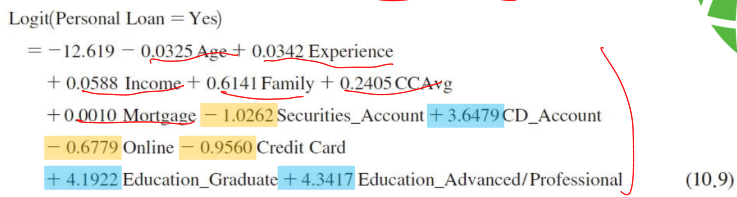

In [4]:
bank_df = dmba.load_data('UniversalBank.csv')
bank_df.drop(columns=['ID', 'ZIP Code'], inplace=True)
bank_df.columns = [c.replace(' ', '_') for c in bank_df.columns]

# Treat education as categorical, convert to dummy variables
bank_df['Education'] = bank_df['Education'].astype('category')
new_categories = {1: 'Undergrad', 2: 'Graduate', 3: 'Advanced/Professional'}
bank_df.Education.cat.rename_categories(new_categories)
bank_df = pd.get_dummies(bank_df, prefix_sep='_', drop_first=True, dtype=int)

y = bank_df['Personal_Loan']
X = bank_df.drop(columns=['Personal_Loan'])

# partition data
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# fit a logistic regression (set penalty=l2 and C=1e42 to avoid regularization)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)

print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print()
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))

intercept  -12.491957854260937
            Age  Experience    Income    Family     CCAvg  Mortgage  \
coeff -0.037738    0.039255  0.058843  0.612243  0.240486  0.001012   

       Securities_Account  CD_Account    Online  CreditCard  Education_2  \
coeff           -1.014505    3.649236 -0.678298   -0.958199     4.202129   

       Education_3  
coeff     4.355743  

AIC -709.1524769205962


### (프로파일링을 위한) 오즈 관점의 결과 해석
$$Odds=e^{\beta_0+\beta_1x_1+\beta_2x_2+...+\beta_qx_q}$$
* x2, x3,..., xq를 일정하게 유지하면서 x1을 한 단위씩 증가시키면 다음과 같이 됨
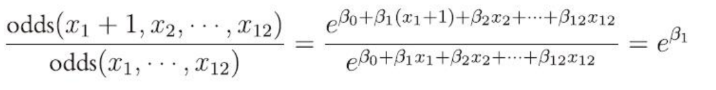

* 예측변수 X_j가 한 단위 증가하면 다른 예측변수들이 모두 일정하다고 가정할 때 오즈는 $e^{\beta_j}$만큼 증가함
    * CD_Account회귀계수가 3.6479로 추정되는 경우,
        * 기준 그룹은 CD계좌를 보유하지 않은 고객
        * 회귀계수에 대한 해석
            * $e^{3.6749}=38.4$는 다른 요인들은 모두 일정한 것으로 가정할 때, CD계좌를 가진 고객이 CD계좌를 가지지 않은 고객에 비해 대출 제안을 수락할 오즈는 38.4배만큼 증가

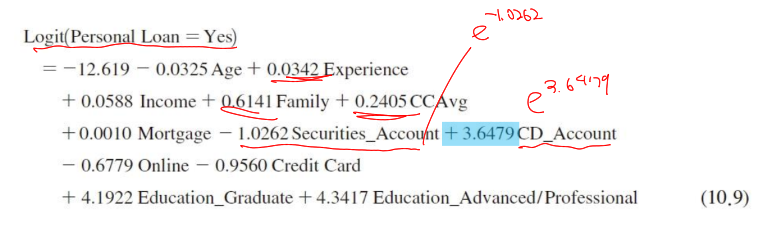

## 분류 성능 평가

In [5]:
logit_reg_pred = logit_reg.predict(valid_X)
logit_reg_proba = logit_reg.predict_proba(valid_X)
logit_result = pd.DataFrame({'actual': valid_y,
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'predicted': logit_reg_pred })

# display four different cases
interestingCases = [2764, 932, 2721, 702]
print(logit_result.loc[interestingCases])

      actual      p(0)      p(1)  predicted
2764       0  0.976091  0.023909          0
932        0  0.330989  0.669011          1
2721       1  0.031432  0.968568          1
702        1  0.985893  0.014107          0


In [6]:
#training confusion matrix
classificationSummary(train_y, logit_reg.predict(train_X))

#validation confusion matrix
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.9600)

       Prediction
Actual    0    1
     0 2683   30
     1   90  197
Confusion Matrix (Accuracy 0.9595)

       Prediction
Actual    0    1
     0 1791   16
     1   65  128


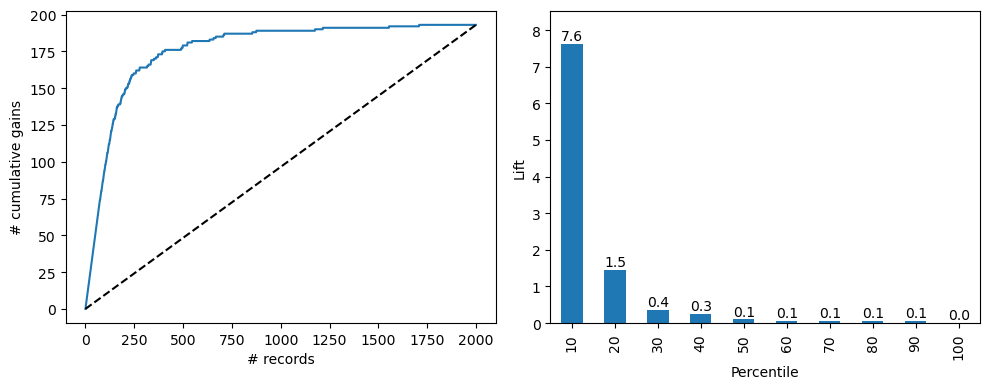

In [7]:
df = logit_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

gainsChart(df.actual, ax=axes[0])
liftChart(df.actual, title=False, ax=axes[1])

plt.tight_layout()
plt.show()

* 1로 분류될 확률이 높은 레코드를 10% 선택한 경우는 레코드를 임의로 10% 선발한 경우보다 대출 제안을 수락한 고객 수가 7.8배 높게 나타남

## 다중 클래스 분류에 대한 로지스틱 회귀 
### 순서형 클래스
* 의미 있는 순서를 가지고 있는 클래스
    * 예) 주식을 추천하는 경우(매수, 보유, 매도)의 3개의 클래스를 순서형으로 처리
        * 클래스가 많은 경우(일반적으로 5 이상) 반응변수를 연속형처럼 취급하여 다중선형회귀를 수행할 수 있음
        * 그러므로 클래스가 3\~5일때 로지스틱 회귀를 확장
    * 주식 추천에서 1=매수, 2=보유, 3=매도 로 표기
    * 클래스에 속할 누적 확률을 활용하여 각 클래스의 확률 계산

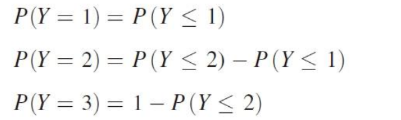

* 로짓을 예측변수의 함수로서 모델링
* 회귀계수 추정
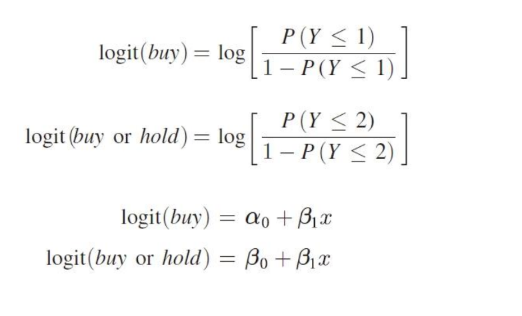

* 각 클래스에 속할 확률 추정
    * 예를 들어, 주식의 확률 추정 값이 P(Y=1)=0.2, P(Y=2)=0.3, P(Y=3)=0.5와 같다면, 이 주식은 매도 추천으로 분류

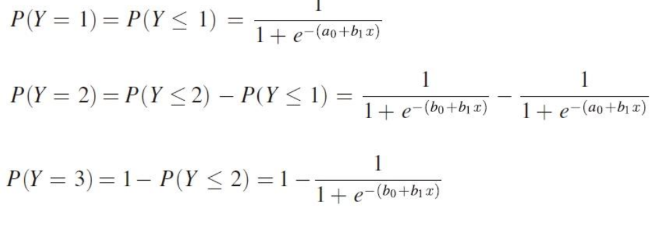

### 명목형 클래스
* 예) 시리얼 제품 브랜드 m=3인 경우, 세 클래스 중 하나를 기준 클래스로 사용함
    * 예제에서는 C를 기준 브랜드로 정함
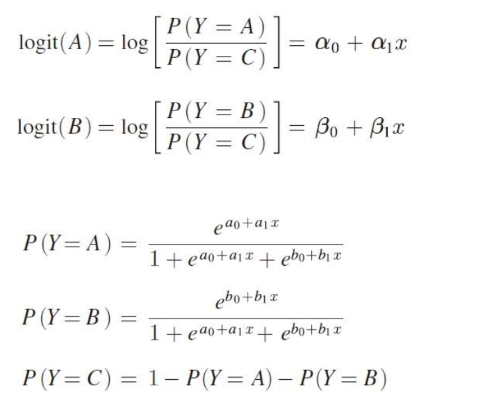

## 다중 클래스 분류에 대한 로지스틱 회귀
### 순서형과 명목형 모델 비교
* 미국 교통 통계국의 사고 데이터(accidentsFull.csv)
    * 예측변수: 알코올 관련 여부(ALCHL_I), 날씨(WEATHER_R)
    * 반응변수: 사고의 심각도(MAX_SEV_IR)(0=부상 없음, 1=비치명부상, 2=사망)
    * 심각도를 순서형 변수로 고려하여 모델 적합
    * 심각도를 명목형 변수로 변경하고 모델 적합
    * 기준이 되는 심각도 수준은 심각도=2

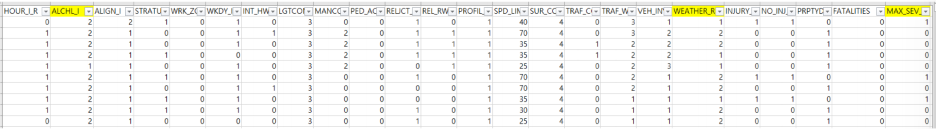

In [8]:
data = dmba.load_data('accidentsFull.csv')
outcome = 'MAX_SEV_IR'
predictors = ['ALCHL_I', 'WEATHER_R']

y = data[outcome]
X = data[predictors]
train_X, train_y = X, y
classes = sorted(y.unique())

print('Nominal logistic regression')
logit = LogisticRegression(penalty="l2", solver='lbfgs', C=1e24, multi_class='multinomial')
logit.fit(X, y)
print('  intercept', logit.intercept_)
print('  coefficients', logit.coef_)
print()
probs = logit.predict_proba(X)
results = pd.DataFrame({
    'actual': y, 'predicted': logit.predict(X),
    'P(0)': [p[0] for p in probs],
    'P(1)': [p[1] for p in probs],
    'P(2)': [p[2] for p in probs],
})
print(results.head())
print()

print('Ordinal logistic regression')
logit = LogisticIT(alpha=0)
logit.fit(X, y)
print('  theta', logit.theta_)
print('  coefficients', logit.coef_)
print()
probs = logit.predict_proba(X)
results = pd.DataFrame({
    'actual': y, 'predicted': logit.predict(X),
    'P(0)': [p[0] for p in probs],
    'P(1)': [p[1] for p in probs],
    'P(2)': [p[2] for p in probs],
})
print(results.head())

Nominal logistic regression


c:\Users\sdh05\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


  intercept [-0.17870851  0.81673248 -0.63802397]
  coefficients [[ 0.52491466  0.40469045]
 [ 0.15763357  0.16071816]
 [-0.68254823 -0.56540861]]

   actual  predicted      P(0)      P(1)      P(2)
0       1          1  0.490569  0.498933  0.010498
1       0          0  0.554023  0.441483  0.004494
2       0          0  0.554023  0.441483  0.004494
3       0          1  0.490569  0.498933  0.010498
4       0          1  0.393700  0.578117  0.028183

Ordinal logistic regression
  theta [-1.06916285  2.77444326]
  coefficients [-0.40112008 -0.25174207]

   actual  predicted      P(0)      P(1)      P(2)
0       1          1  0.496205  0.482514  0.021281
1       0          0  0.558866  0.424510  0.016624
2       0          0  0.558866  0.424510  0.016624
3       0          1  0.496205  0.482514  0.021281
4       0          1  0.397402  0.571145  0.031453


## 분석 예제: 연착 항공편 예측
### 분석 목적: 데이터셋에 포함되어 있지 않은 새로운 항공편의 연착 여부를 정확하게 예측하는 것
* 반응변수는 Flight Status로 delayed 또는 ontime의 두 가지 결과값을 가질 수 있음

* 첫 번째 목적: 예측 변수의 정보를 기반으로 새로운 비행기의 연착 여부를 정확하게 분류하는 모델을 찾는 것
* 두 번째 목적: 연착될 가능성이 가장 높거나 낮은 항공편의 비율을 찾는 것(ranking)
* 세 번째 목적: 항공편을 프로파일링하는 것. 즉,(이 표본 뿐만 아니라 해당 노선의 전체 항공편에 대해)어떤 요인이 연착과 관련이 되어 있는지 찾아내고 이들 요인을 정량화하고자 함

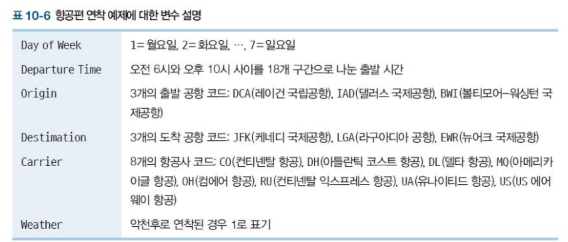

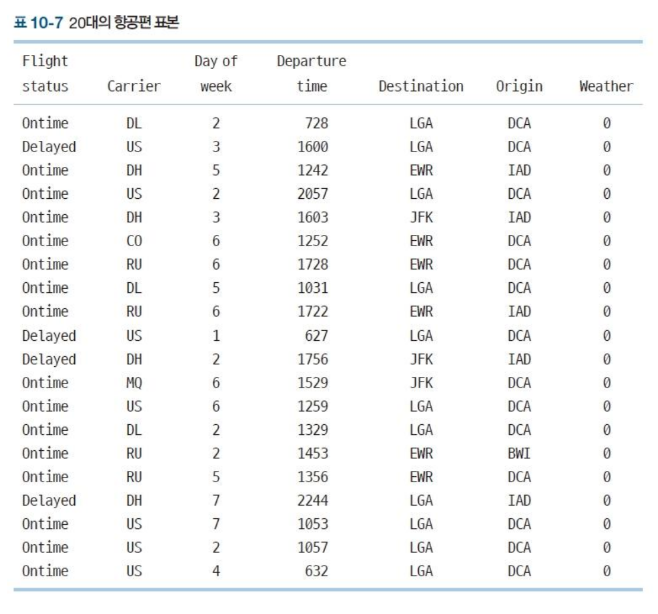

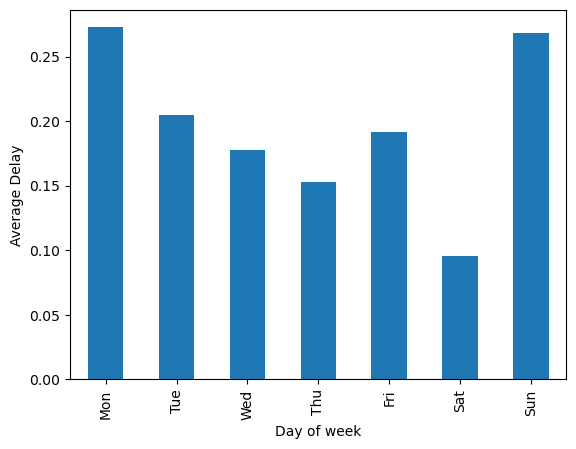

In [12]:
delays_df = dmba.load_data('FlightDelays.csv')
# Create an indicator variable
delays_df['isDelayed'] = [1 if status == 'delayed' else 0 for status in delays_df['Flight Status']]

# group information by day of week and determine the average delay
averageDelay = delays_df.groupby(['DAY_WEEK'])['isDelayed'].mean()

# create a bar chart
ax = averageDelay.plot.bar(color='C0')
ax.set_xlabel('Day of week')
ax.set_ylabel('Average Delay')
_ = ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

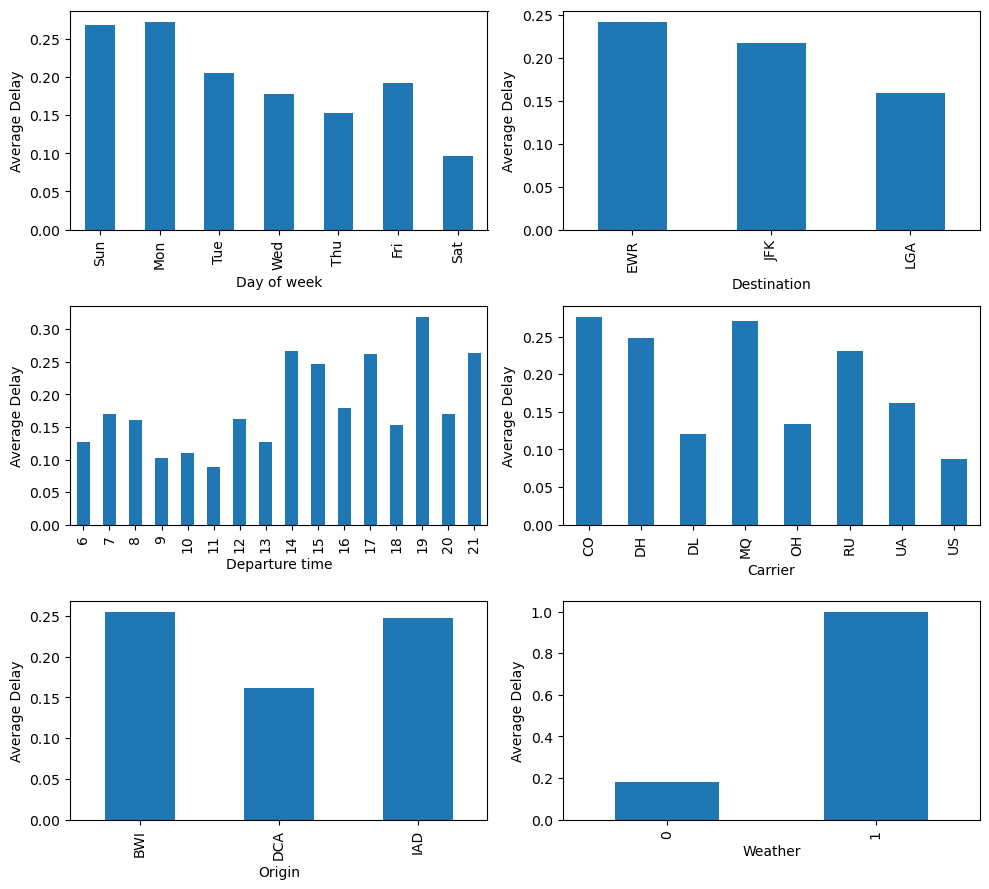

In [13]:
delays_df = dmba.load_data('FlightDelays.csv')
# Create an indicator variable
delays_df['isDelayed'] = [1 if status == 'delayed' else 0
                          for status in delays_df['Flight Status']]

def createGraph(group, xlabel, axis):
    groupAverage = delays_df.groupby([group])['isDelayed'].mean()
    if group == 'DAY_WEEK': # rotate so that display starts on Sunday
        groupAverage = groupAverage.reindex(index=np.roll(groupAverage.index,1))
        groupAverage.index = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
    ax = groupAverage.plot.bar(color='C0', ax=axis)
    ax.set_ylabel('Average Delay')
    ax.set_xlabel(xlabel)
    return ax

def graphDepartureTime(xlabel, axis):
    temp_df = pd.DataFrame({'CRS_DEP_TIME': delays_df['CRS_DEP_TIME'] // 100,
                            'isDelayed': delays_df['isDelayed']})
    groupAverage = temp_df.groupby(['CRS_DEP_TIME'])['isDelayed'].mean()
    ax = groupAverage.plot.bar(color='C0', ax=axis)
    ax.set_xlabel(xlabel); ax.set_ylabel('Average Delay')

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 9))

createGraph('DAY_WEEK', 'Day of week', axis=axes[0][0])
createGraph('DEST', 'Destination', axis=axes[0][1])
graphDepartureTime('Departure time', axis=axes[1][0])
createGraph('CARRIER', 'Carrier', axis=axes[1][1])
createGraph('ORIGIN', 'Origin', axis=axes[2][0])
createGraph('Weather', 'Weather', axis=axes[2][1])
plt.tight_layout()

plt.show()

C:\Users\sdh05\AppData\Local\Temp\ipykernel_13100\1548337821.py:16: FutureWarning: The provided callable <function sum at 0x0000013AEED05F80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data = pd.pivot_table(agg[agg.ORIGIN == origin], values='isDelayed', aggfunc=np.sum,
C:\Users\sdh05\AppData\Local\Temp\ipykernel_13100\1548337821.py:16: FutureWarning: The provided callable <function sum at 0x0000013AEED05F80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data = pd.pivot_table(agg[agg.ORIGIN == origin], values='isDelayed', aggfunc=np.sum,
C:\Users\sdh05\AppData\Local\Temp\ipykernel_13100\1548337821.py:16: FutureWarning: The provided callable <function sum at 0x0000013AEED05F80> is currently using DataFrameGroupBy.sum. In a future v

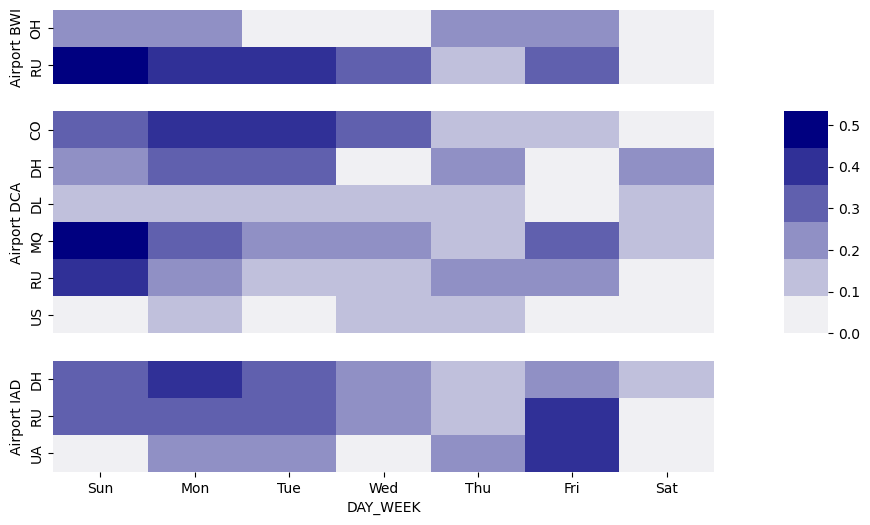

In [14]:
agg = delays_df.groupby(['ORIGIN', 'DAY_WEEK', 'CARRIER']).isDelayed.mean()
agg = agg.reset_index()

# Define the layout of the graph
height_ratios = []
for i, origin in enumerate(sorted(delays_df.ORIGIN.unique())):
    height_ratios.append(len(agg[agg.ORIGIN == origin].CARRIER.unique()))
gridspec_kw = {'height_ratios': height_ratios, 'width_ratios': [15, 1]}
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 6),
                         gridspec_kw = gridspec_kw)
axes[0, 1].axis('off')
axes[2, 1].axis('off')

maxIsDelay = agg.isDelayed.max()
for i, origin in enumerate(sorted(delays_df.ORIGIN.unique())):
    data = pd.pivot_table(agg[agg.ORIGIN == origin], values='isDelayed', aggfunc=np.sum,
                          index=['CARRIER'], columns=['DAY_WEEK'])
    data = data[[7, 1, 2, 3, 4, 5, 6]]  # Shift last columns to first
    ax = sns.heatmap(data, ax=axes[i][0], vmin=0, vmax=maxIsDelay,
                     cbar_ax=axes[1][1], cmap=sns.light_palette("navy"))
    ax.set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
    if i != 2:
        ax.get_xaxis().set_visible(False)
    ax.set_ylabel('Airport ' + origin)


plt.show()

In [15]:
delays_df = dmba.load_data('FlightDelays.csv')
# Create an indicator variable
delays_df['isDelayed'] = [1 if status == 'delayed' else 0
                          for status in delays_df['Flight Status']]

# convert to categorical
delays_df.DAY_WEEK = delays_df.DAY_WEEK.astype('category')

# create hourly bins departure time
delays_df.CRS_DEP_TIME = [round(t / 100) for t in delays_df.CRS_DEP_TIME]
delays_df.CRS_DEP_TIME = delays_df.CRS_DEP_TIME.astype('category')

predictors = ['DAY_WEEK', 'CRS_DEP_TIME', 'ORIGIN', 'DEST', 'CARRIER', 'Weather']
outcome = 'isDelayed'

X = pd.get_dummies(delays_df[predictors], drop_first=True)
y = delays_df[outcome]
classes = ['ontime', 'delayed']

# split into training and validation
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4,
                                                      random_state=1)

logit_full = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_full.fit(train_X, train_y)

pd.set_option('display.width', 95)
pd.set_option('display.precision',3)
pd.set_option('display.max_columns', 33)
print('intercept ', logit_full.intercept_[0])

print(pd.DataFrame({'coeff': logit_full.coef_[0]}, index=X.columns).transpose())
print()
print('AIC', AIC_score(valid_y, logit_full.predict(valid_X), df=len(train_X.columns) + 1))
pd.reset_option('display.width')
pd.reset_option('display.precision')
pd.reset_option('display.max_columns')

intercept  -1.2190978471868632
       Weather  DAY_WEEK_2  DAY_WEEK_3  DAY_WEEK_4  DAY_WEEK_5  DAY_WEEK_6  DAY_WEEK_7  \
coeff    9.325      -0.598      -0.705      -0.799      -0.296      -1.129      -0.135   

       CRS_DEP_TIME_7  CRS_DEP_TIME_8  CRS_DEP_TIME_9  CRS_DEP_TIME_10  CRS_DEP_TIME_11  \
coeff           0.631           0.382          -0.365            0.337            0.078   

       CRS_DEP_TIME_12  CRS_DEP_TIME_13  CRS_DEP_TIME_14  CRS_DEP_TIME_15  CRS_DEP_TIME_16  \
coeff            0.399            0.175            0.202            1.265            0.628   

       CRS_DEP_TIME_17  CRS_DEP_TIME_18  CRS_DEP_TIME_19  CRS_DEP_TIME_20  CRS_DEP_TIME_21  \
coeff            1.093            0.285            1.655            1.023            1.077   

       ORIGIN_DCA  ORIGIN_IAD  DEST_JFK  DEST_LGA  CARRIER_DH  CARRIER_DL  CARRIER_MQ  \
coeff       -0.01      -0.134    -0.524    -0.546       0.352      -0.685       0.743   

       CARRIER_OH  CARRIER_RU  CARRIER_UA  CARRI

### 모델의 해석
* 도착 공항이 JFK(DEST_JFK)인 경우 회귀 계수는 -0.524로 추정됨
    * 도착공항 변수에 대한 기준 범주는 EWR이였음
    * (해석) 다른 요인이 모두 일정할 때, $e^{-0.524}=0.59$는 EWR로 도착하는 항공편이 연착될 오즈(기준 항공편의 오즈)에 대해 JRK로 도착하는 항공편이 연착될 오즈임
        * 이는 (다른 요인이 모두 일정할 때)EWR에 도착하는 항공편이 JFK에 도착하는 항공편보다 연착될 가능성이 더 크다는 것을 의미함
    * 항공사(CO가 기준 범주)의 경우, (다른 요인이 모두 일정할 때) US가 가장 큰 음의 계수를 갖고 있어 연착될 오즈가 가장 낮고, MQ는 연착될 오즈가 가장 높음
    * (다른 요인이 모두 일정할 때) 모든 회귀계수가 음수인 월요일(DAY_WEEK=1, 기준 범주)의 연착확률이 가장 높은 반면에, 토요일은 가장 큰 음의 계수를 갖고 있어 연착 확률이 가장 낮음

Confusion Matrix (Accuracy 0.8309)

        Prediction
 Actual  ontime delayed
 ontime     705       9
delayed     140      27


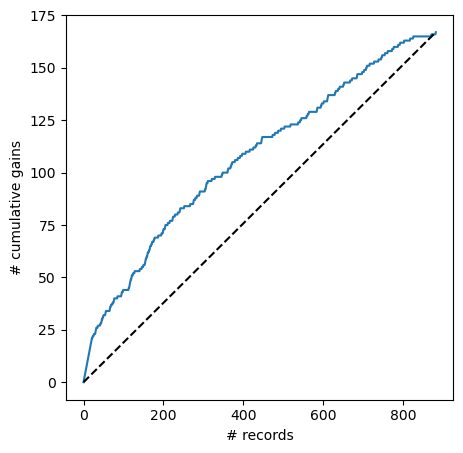

In [16]:
logit_reg_pred = logit_full.predict_proba(valid_X)
full_result = pd.DataFrame({'actual': valid_y,
                            'p(0)': [p[0] for p in logit_reg_pred],
                            'p(1)': [p[1] for p in logit_reg_pred],
                            'predicted': logit_full.predict(valid_X)})
full_result = full_result.sort_values(by=['p(1)'], ascending=False)

# confusion matrix
classificationSummary(full_result.actual, full_result.predicted, class_names=classes)

gainsChart(full_result.actual, figsize=[5, 5])

plt.show()

### 모델 구축의 목적: 연착할 가능성이 가장 높은 항공편을 찾아내 항공기의 연착을 줄이거나 그 영향을 완화할 수 있도록 조치하는 것
* 연착 가능성을 미리 알게 된다면,
    * 관제사는
        *항로를 추가로 열 수 있음
        * 짧은 시간동안 특정 지역에 더 많은 관제사를 할당할 수 있음
    * 항공사는
        * 고객들의 예약 관리
        * 비행 예정 승무원과 항공기를 대기시킬 수 있음
    * 호텔
        * 발이 묶인 여행자들을 위한 숙박공간 마련

### 변수 선택
* 몇몇 예측 변수를 제거하거나 다르게 코드해야 함
* 항공편이 거의 없거나 전혀 없는 범주의 항공편 개수를 살펴봐야 함
    * 대부분 DCA에서 출발. 3개의 공항 모두에서 출발하는 항공사에서는 출발 공항이 어딘지 관계없이 연착률이 비슷하게 나타남
        * 따라서, 출발 공항 가변수를 제외하여 출발 공항 변수를 제거
* 연착과 관련하여 항공사, 요일, 출발 시간을 좀 더 적은 범주로 그룹화 함
    * 예) 일요일과 월요일은 화\~토요일의 낮은 연착률과 다른 유사한 연착률을 보이므로, 요일을 일요일+월요일과 기타 요일로 그룹화하여 하나의 가변수로 나타냄

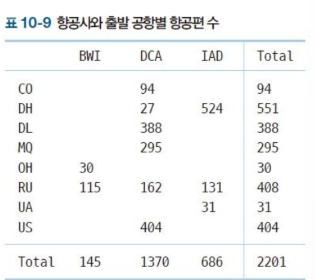

In [17]:
delays_df = dmba.load_data('FlightDelays.csv')
delays_df['isDelayed'] = [1 if status == 'delayed' else 0
                          for status in delays_df['Flight Status']]
delays_df['CRS_DEP_TIME'] = [round(t / 100) for t in delays_df['CRS_DEP_TIME']]
delays_red_df = pd.DataFrame({
    'Sun_Mon' : [1 if d in (1, 7) else 0 for d in delays_df.DAY_WEEK],
    'Weather' : delays_df.Weather,
    'CARRIER_CO_MQ_DH_RU' : [1 if d in ("CO", "MQ", "DH", "RU") else 0
                             for d in delays_df.CARRIER],
    'MORNING' : [1 if d in (6, 7, 8, 9) else 0 for d in delays_df.CRS_DEP_TIME],
    'NOON' : [1 if d in (10, 11, 12, 13) else 0 for d in delays_df.CRS_DEP_TIME],
    'AFTER2P' : [1 if d in (14, 15, 16, 17, 18) else 0 for d in delays_df.CRS_DEP_TIME],
    'EVENING' : [1 if d in (19, 20) else 0 for d in delays_df.CRS_DEP_TIME],
    'isDelayed' : [1 if status == 'delayed' else 0 for status in delays_df['Flight Status']],
})

X = delays_red_df.drop(columns=['isDelayed'])
y = delays_red_df['isDelayed']
classes = ['ontime', 'delayed']

# split into training and validation
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4,
                                                      random_state=1)

logit_red = LogisticRegressionCV(penalty="l1", solver='liblinear', cv=5)
logit_red.fit(train_X, train_y)

pd.set_option('display.width', 100)
print('regularization', logit_red.C_)
print('intercept ', logit_red.intercept_[0])
print(pd.DataFrame({'coeff': logit_red.coef_[0]}, index=X.columns).transpose())
pd.reset_option('display.width')
print('AIC', AIC_score(valid_y, logit_red.predict(valid_X), df=len(train_X.columns) + 1))


# confusion matrix
classificationSummary(valid_y, logit_red.predict(valid_X), class_names=classes)

regularization [2.7825594]
intercept  -2.287100758409353
       Sun_Mon   Weather  CARRIER_CO_MQ_DH_RU   MORNING      NOON   AFTER2P   EVENING
coeff   0.5779  4.977933             1.298693 -0.583407 -0.665985 -0.055282  0.560714
AIC 934.6153607819033
Confusion Matrix (Accuracy 0.8343)

        Prediction
 Actual  ontime delayed
 ontime     711       3
delayed     143      24


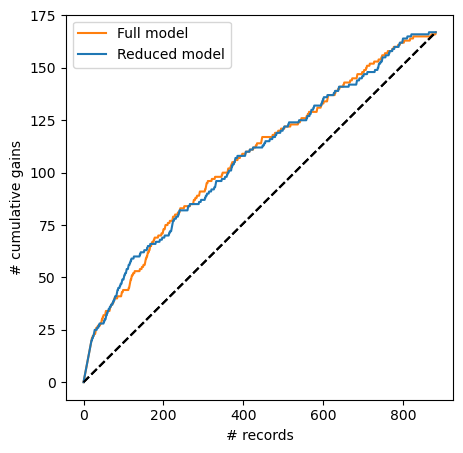

In [19]:
logit_reg_proba = logit_red.predict_proba(valid_X)
red_result = pd.DataFrame({'actual': valid_y,
                            'p(0)': [p[0] for p in logit_reg_proba],
                            'p(1)': [p[1] for p in logit_reg_proba],
                            'predicted': logit_red.predict(valid_X),
                          })
red_result = red_result.sort_values(by=['p(1)'], ascending=False)

ax = gainsChart(full_result.actual, label='Full model', color='C1', figsize=[5, 5])
ax = gainsChart(red_result.actual, label='Reduced model', color='C0', ax=ax)
ax.legend()

plt.show()

In [20]:
# same initial preprocessing and creating dummies

# add constant column
bank_df = sm.add_constant(bank_df, prepend=True)

y = bank_df['Personal_Loan']
X = bank_df.drop(columns=['Personal_Loan'])

# partition data
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# use GLM (general linear model) with the binomial family to fit a logistic regression
logit_reg = sm.GLM(train_y, train_X, family=sm.families.Binomial())
logit_result = logit_reg.fit()
print(logit_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:          Personal_Loan   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2987
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -340.15
Date:                Tue, 10 Dec 2024   Deviance:                       680.30
Time:                        23:00:16   Pearson chi2:                 8.10e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3325
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -12.5634      2